<a href="https://colab.research.google.com/github/BiancaPedrosa/datascience/blob/master/Notebooks/Bootcamp1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de bibliotecas


<h1>Projeto Módulo I Bootcamp Alura</h1>

<h3>Análise dos casos de turbeculose no estado de SP entre 2009 - 2018</h3>
<p>Objetivo é analisar se há correlação espacial entre as cidades com mais casos
No momento ainda não há dados espaciais.</p>


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

Leitura dos dados

In [ ]:
#tabela do Datasus
url="https://raw.githubusercontent.com/BiancaPedrosa/datascience/master/dados/A172345189_28_143_208.csv"


dados = pd.read_csv(url, encoding="ISO-8859-1", engine='python',skiprows=3, skipfooter=18, sep=";",thousands=".", decimal=",", index_col=0)
dados

,1980,1981,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1995,1996,1997,1998,1999,2001,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Município de notificação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
350010 Adamantina,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,5,5,7,6,6,3,6,3,5,4,-,-,50
350020 Adolfo,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,1,-,2,-,1,1,-,-,-,6
350030 Aguaí,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,7,12,10,15,8,7,9,9,7,3,-,-,87
350050 Águas de Lindóia,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,2,1,1,3,1,-,1,3,5,2,-,-,19
350055 Águas de Santa Bárbara,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,-,-,1,1,-,2,-,-,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355695 Vitória Brasil,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,1,2,-,-,-,1,1,-,-,-,-,5
355700 Votorantim,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,39,36,34,37,47,21,28,39,36,45,-,-,362
355710 Votuporanga,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,24,32,23,24,21,13,17,23,19,24,-,-,220


Tratando a ausência de dados

In [ ]:
dados = dados.replace('-', np.nan)
dados.head()

,1980,1981,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1995,1996,1997,1998,1999,2001,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Município de notificação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
350010 Adamantina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,7,6,6,3,6,3,5,4,NaN,NaN,50
350020 Adolfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,NaN,2,NaN,1,1,NaN,NaN,NaN,6
350030 Aguaí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,12,10,15,8,7,9,9,7,3,NaN,NaN,87
350050 Águas de Lindóia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,1,1,3,1,NaN,1,3,5,2,NaN,NaN,19
350055 Águas de Santa Bárbara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,1,1,NaN,2,NaN,NaN,5


Conferindo as células sem valor


In [ ]:
dados.T.info()
dados.isnull().sum().sum()

<class 'pandas.core.frame.DataFrame'>
Index: 38 entries, 1980 to Total
Columns: 621 entries, 350010 Adamantina to Total
dtypes: object(621)
memory usage: 185.9+ KB


18351

In [ ]:
dados = dados.astype('float64')
dados.head()

,1980,1981,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1995,1996,1997,1998,1999,2001,2002,2003,2004,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,Total
Município de notificação,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
350010 Adamantina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,7.0,6.0,6.0,3.0,6.0,3.0,5.0,4.0,NaN,NaN,50.0
350020 Adolfo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN,NaN,NaN,6.0
350030 Aguaí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,12.0,10.0,15.0,8.0,7.0,9.0,9.0,7.0,3.0,NaN,NaN,87.0
350050 Águas de Lindóia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,1.0,1.0,3.0,1.0,NaN,1.0,3.0,5.0,2.0,NaN,NaN,19.0
350055 Águas de Santa Bárbara,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,2.0,NaN,NaN,5.0


Selecionando as colunas usáveis

In [ ]:
usaveis = dados.loc[:,'2009':'2018']
usaveis

,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Município de notificação,,,,,,,,,,
350010 Adamantina,5.0,5.0,7.0,6.0,6.0,3.0,6.0,3.0,5.0,4.0
350020 Adolfo,NaN,NaN,1.0,1.0,NaN,2.0,NaN,1.0,1.0,NaN
350030 Aguaí,7.0,12.0,10.0,15.0,8.0,7.0,9.0,9.0,7.0,3.0
350050 Águas de Lindóia,2.0,1.0,1.0,3.0,1.0,NaN,1.0,3.0,5.0,2.0
350055 Águas de Santa Bárbara,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...
355695 Vitória Brasil,NaN,1.0,2.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN
355700 Votorantim,39.0,36.0,34.0,37.0,47.0,21.0,28.0,39.0,36.0,45.0
355710 Votuporanga,24.0,32.0,23.0,24.0,21.0,13.0,17.0,23.0,19.0,24.0


Ordenando os dados por  ordem decrescente de casos


In [ ]:
#ordenando
usaveis["Total"] = usaveis.sum(axis=1)
ordenado = usaveis.sort_values("Total", ascending=False)
ordenado = ordenado.drop("Total", axis=0)
ordenado = ordenado.drop("Total", axis=1)
ordenado.head()


,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Município de notificação,,,,,,,,,,
355030 São Paulo,7005.0,7353.0,7582.0,7154.0,7529.0,7585.0,7979.0,7379.0,8018.0,8266.0
351880 Guarulhos,394.0,434.0,478.0,437.0,568.0,536.0,569.0,579.0,524.0,629.0
350950 Campinas,478.0,432.0,437.0,500.0,504.0,537.0,559.0,465.0,535.0,560.0
355100 São Vicente,366.0,381.0,409.0,388.0,387.0,482.0,504.0,547.0,602.0,571.0
354850 Santos,422.0,430.0,432.0,426.0,437.0,428.0,423.0,412.0,398.0,428.0


Plotando o gráfico

Text(0, 0.5, 'Nº de Internação')

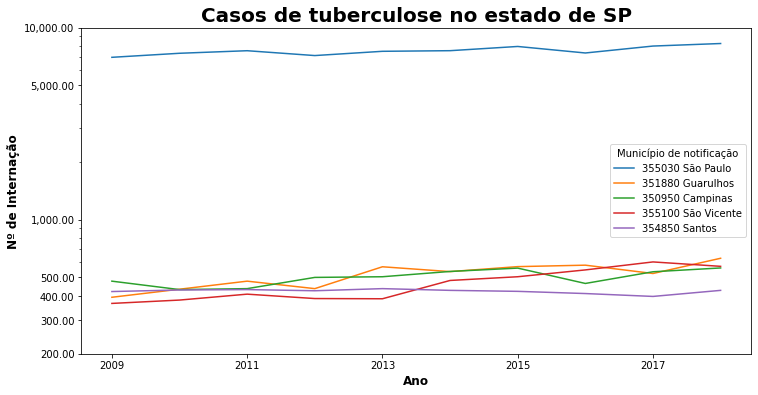

In [ ]:
grafico = ordenado.head().T.plot(figsize=(12, 6))
plt.title('Casos de tuberculose no estado de SP', fontsize = 20, fontweight = 'bold')

grafico.set_yscale('log')
grafico.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:,.2f}"))

plt.yticks([ 200, 300, 400, 500, 1000,5000,10000])

grafico.set_xlabel('Ano', fontsize=12,fontweight = 'bold')
grafico.set_ylabel('Nº de Internação', fontsize=12, fontweight = 'bold')




<h3>Considerações finais</h3>
<p>O plano inicial era usar os dados populacionais de todas as cidades em todos os anos. Estes dados não foram usados ainda, pois tive dificuldades com o formato utf-8, que já foi resolvido. Entretanto, decidi não deu tempo de usá-lo agora, pois não daria para concluir o desafio para envio no prazo.</p>
<p>Se quiserem dar uma olhada no dado, segue o link</p>
[DataScience/Data](https://github.com/BiancaPedrosa/datascience/blob/master/dados/tabelautf8.csv)

[Nova tentativa com dados de população](https://colab.research.google.com/drive/1161XHiCkA59WcgfOUvqTTiUN-nsxTad0?usp=sharing)

